# Cấp quyền truy cập cho google drive

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130911 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!pip install keras

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


# Kết nối dữ liệu từ google drive

In [0]:
train_dir = '/content/drive/Colab/BW/Data/Train'
validation_dir = '/content/drive/Colab/BW/Data/Validation'
test_dir = '/content/drive/Colab/BW/Data/Test'
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=180,
                width_shift_range=0.2,
                height_shift_range=0.18,
                shear_range=0.15,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(256, 256),
                batch_size=128,
                class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
                validation_dir,
                target_size=(256, 256),
                class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(256, 256),
                class_mode='categorical')

Using TensorFlow backend.


Found 261 images belonging to 4 classes.
Found 20 images belonging to 4 classes.
Found 14 images belonging to 4 classes.


# Tạo mô hình và trọng số đã huấn luyện từ trước

In [0]:
from keras.models import model_from_json
# load json and create model
json_file = open('/content/drive/Colab/BW/VGG16/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/Colab/BW/VGG16/weightsV200000050.h5")


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Dự đoán và hiển thị kết quả

Found 10 images belonging to 4 classes.
{'BEND': 0, 'DEEP LINE': 1, 'DENT': 2, 'LINK OPEN': 3}
Lable: 0


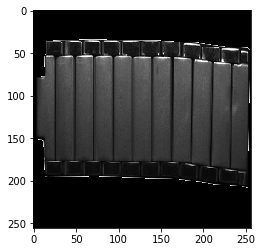

Prediction: [0]
Correct 

Lable: 2


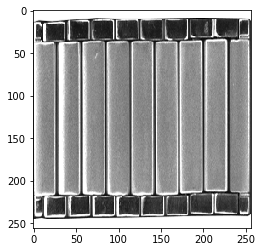

Prediction: [2]
Correct 

Lable: 3


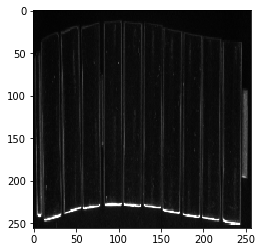

Prediction: [2]
Incorrect 

Lable: 0


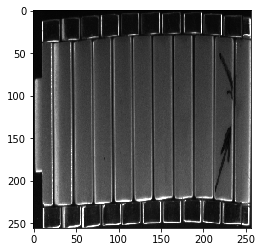

Prediction: [2]
Incorrect 

Lable: 3


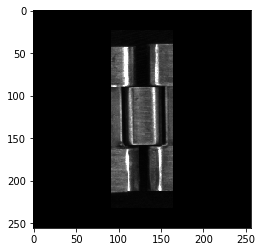

Prediction: [3]
Correct 

Lable: 1


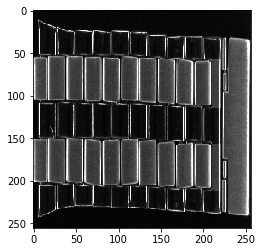

Prediction: [1]
Correct 

Lable: 3


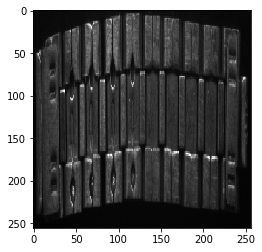

Prediction: [3]
Correct 

Lable: 1


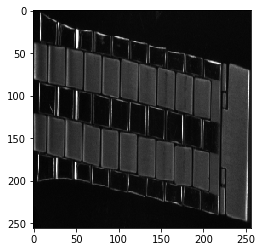

Prediction: [1]
Correct 

Lable: 2


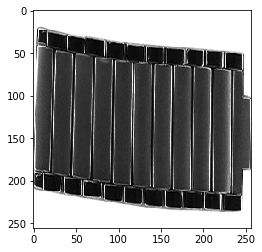

Prediction: [2]
Correct 

Lable: 0


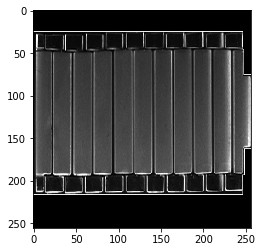

Prediction: [0]
Correct 

Correct: 8, Incorrect: 2, Accuracy: 0.8


In [0]:
#Visualize
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
test_dir = '/content/drive/Colab/BW/Data/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(256, 256),
                class_mode='categorical')

classes = test_generator.class_indices    
x,y = next(test_generator)
x = np.array(x)
y = np.array(y)

count = 0
print(classes)
for i in range(len(y)):
  print ('Lable: ' + str(np.argmax(y[i])))
  image = x[i]
  plt.imshow(image)
  plt.show()
  
  print ('Prediction: ' + str(loaded_model.predict_classes(image.reshape((1,image.shape[0], image.shape[1], image.shape[2])))))
  if (loaded_model.predict_classes(image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))) - np.argmax(y[i])) == 0:
    print ('Correct '+'\n')
    count = count + 1
  else:
    print ('Incorrect '+'\n')
print ('Correct: '+str(count) + ', Incorrect: '+str(len(y)-count)+', Accuracy: '+ str(count/len(y)))